In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import jdatetime
import re
import tqdm
from tqdm import tqdm
from urlextract import URLExtract
import emojis
import hazm
from hazm import *
import nltk
from wordcloud_fa import WordCloudFa
import arabic_reshaper
from arabic_reshaper import reshape
from bidi.algorithm import get_display
from collections import Counter
from nltk.util import ngrams

In [97]:
df = pd.read_json(r'data/PP-data.json')
df.head()

,dict_id,date,text,persian_year,persian_month,persian_day,hour,day_of_week,PP_text,length,num_tokens,lemma_text
0,4,2023-03-09 01:37:38,امروز؛ سحرگاه ۱۸ام اسفندماه، فرزند دومم متولد شد.,1401,12,18,1,Thursday,امروز؛ سحرگاه 18ام اسفندماه فرزند دومم متولد شد,48,10,امروز سحرگاه 18ام اسفندماه فرزند دومم متولد شد
1,7,2023-03-09 02:11:02,من کیستم؟\n\nمبر ز موی سپیدم گمان به عمر دراز\...,1401,12,18,2,Thursday,من کیستم مبر ز موی سپیدم گمان به عمر درازجوان ...,189,36,کیستم مبر ز موی سپیدم گمان عمر درازجوان ز حادث...
2,8,2023-03-09 02:20:06,['شاید به دردتان خورد:\n\nبداهه یا حرف\u200cها...,1401,12,18,2,Thursday,شاید به دردتان خورد بداهه یا حرفهای روزمره ຯپ...,298,54,دردتان خورد بداهه حرفهای روزمره ຯپسرام هیونگی ...
3,9,2023-03-09 16:00:14,سلام بر راه، که جدایی و وصال همگان از اوست!,1401,12,18,16,Thursday,سلام بر راه که جدایی و وصال همگان از اوست,42,10,سلام جدایی وصال همگان اوست
4,10,2023-03-09 17:54:51,این دفعه، زمان بیشتری رو توی تاریکی می‌گذرونیم.,1401,12,18,17,Thursday,این دفعه زمان بیشتری رو توی تاریکی میگذرونیم,45,8,دفعه زمان بیشتری توی تاریکی میگذرونیم


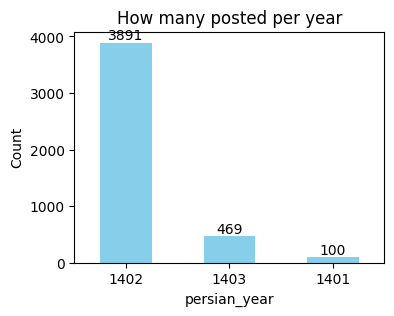

In [98]:
value_counts = df['persian_year'].value_counts()
plt.figure(figsize=(4, 3))
ax =  value_counts.plot(kind='bar', color='skyblue')
plt.title('How many posted per year')
plt.xlabel('persian_year')
plt.ylabel('Count')
plt.xticks(rotation=0)
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height() + 0.05, str(i.get_height()), ha='center', va='bottom')
plt.show()

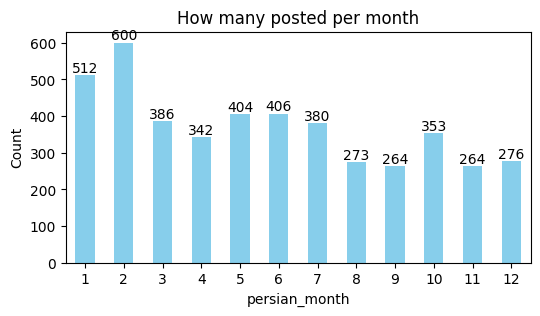

In [99]:
value_counts = df['persian_month'].value_counts().sort_index()
plt.figure(figsize=(6, 3))
ax =  value_counts.plot(kind='bar', color='skyblue')
plt.title('How many posted per month')
plt.xlabel('persian_month')
plt.ylabel('Count')
plt.xticks(rotation=0)
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height() + 0.05, str(i.get_height()), ha='center', va='bottom')
plt.show()

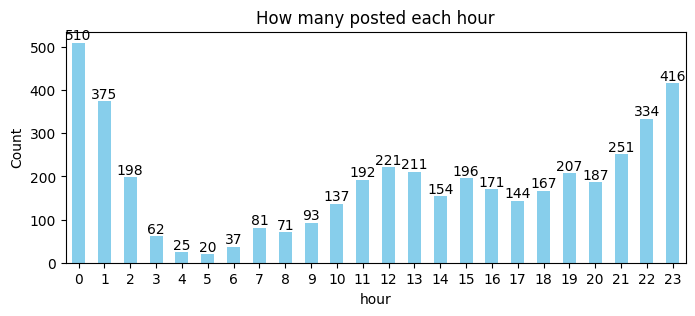

In [100]:
value_counts = df['hour'].value_counts().sort_index()
plt.figure(figsize=(8, 3))
ax =  value_counts.plot(kind='bar', color='skyblue')
plt.title('How many posted each hour')
plt.xlabel('hour')
plt.ylabel('Count')
plt.xticks(rotation=0)
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height() + 0.05, str(i.get_height()), ha='center', va='bottom')
plt.show()

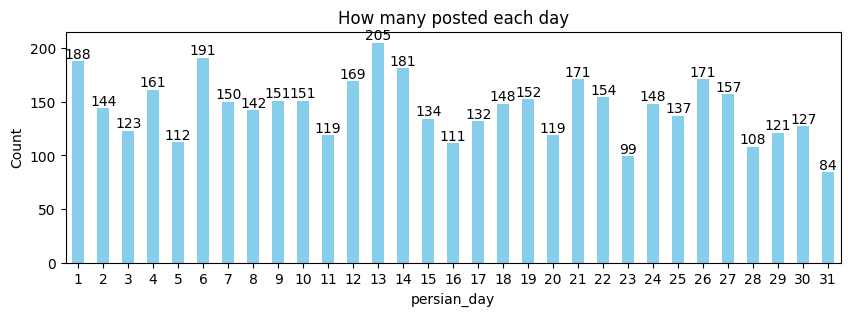

In [101]:
value_counts = df['persian_day'].value_counts().sort_index()
plt.figure(figsize=(10, 3))
ax =  value_counts.plot(kind='bar', color='skyblue')
plt.title('How many posted each day')
plt.xlabel('persian_day')
plt.ylabel('Count')
plt.xticks(rotation=0)
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height() + 0.05, str(i.get_height()), ha='center', va='bottom')
plt.show()

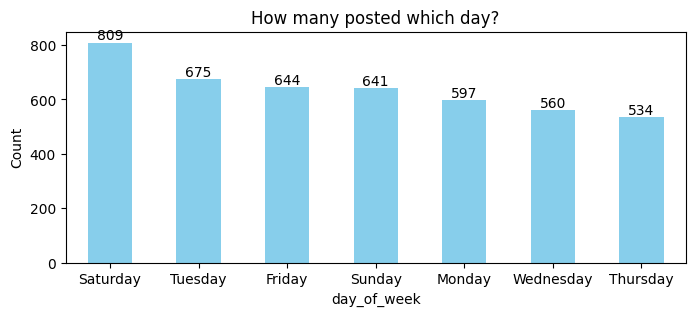

In [102]:
value_counts = df['day_of_week'].value_counts()
plt.figure(figsize=(8, 3))
ax =  value_counts.plot(kind='bar', color='skyblue')
plt.title('How many posted which day?')
plt.xlabel('day_of_week')
plt.ylabel('Count')
plt.xticks(rotation=0)
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height() + 0.05, str(i.get_height()), ha='center', va='bottom')
plt.show()

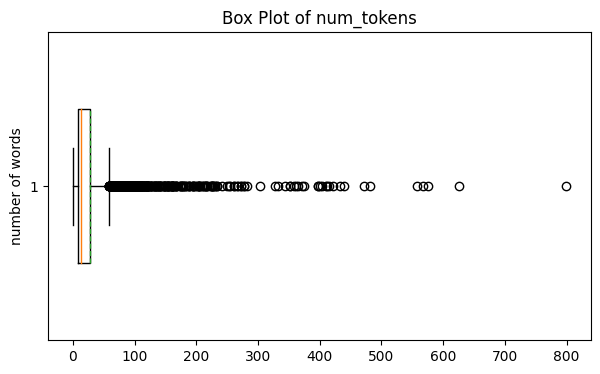

In [103]:
plt.figure(figsize=(7, 4))
plt.boxplot(df['num_tokens'], vert=False, widths = 0.5, showmeans = True, meanline = True)
plt.title('Box Plot of num_tokens')
plt.ylabel('number of words')
plt.show()

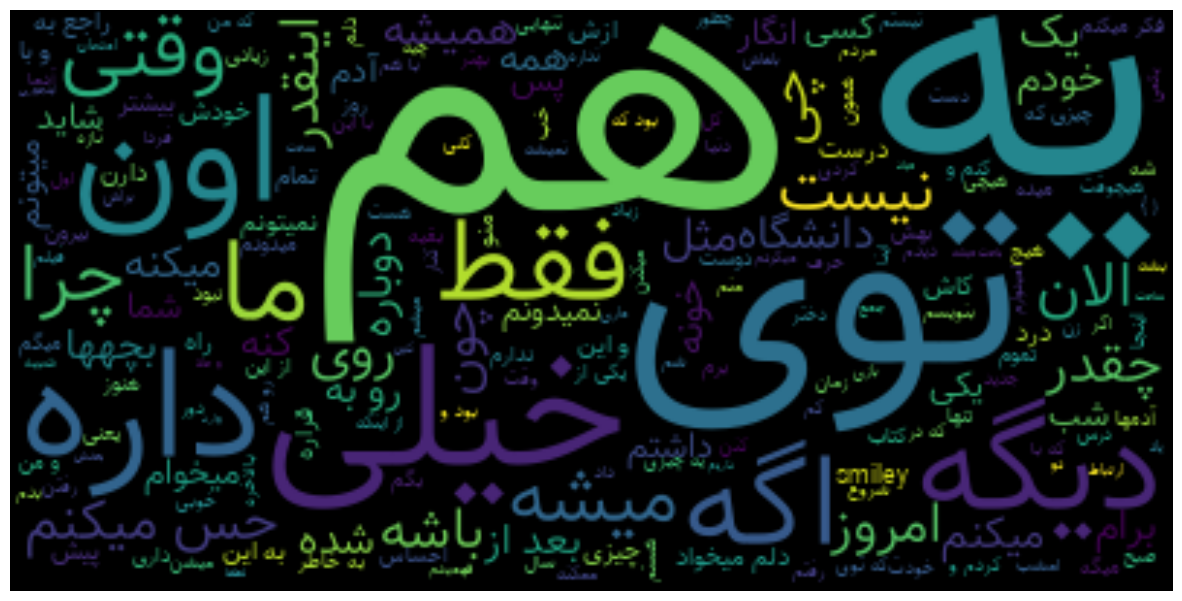

In [104]:
text = ' '.join(df['PP_text'].astype(str))
wc = WordCloudFa()
word_cloud = wc.generate(text)
image = word_cloud.to_image()
plt.figure(figsize=(15, 12))
plt.imshow(image, interpolation='bilinear')
plt.axis("off")
plt.show()

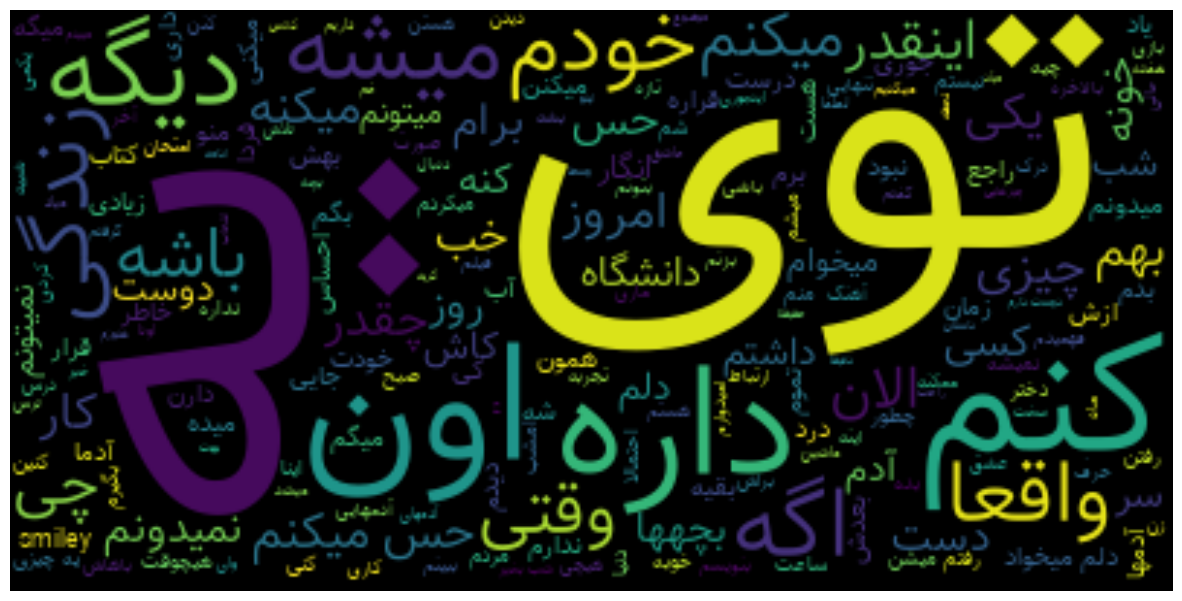

In [105]:
text = ' '.join(df['lemma_text'].astype(str))
wc = WordCloudFa()
word_cloud = wc.generate(text)
image = word_cloud.to_image()
plt.figure(figsize=(15, 12))
plt.imshow(image, interpolation='bilinear')
plt.axis("off")
plt.show()

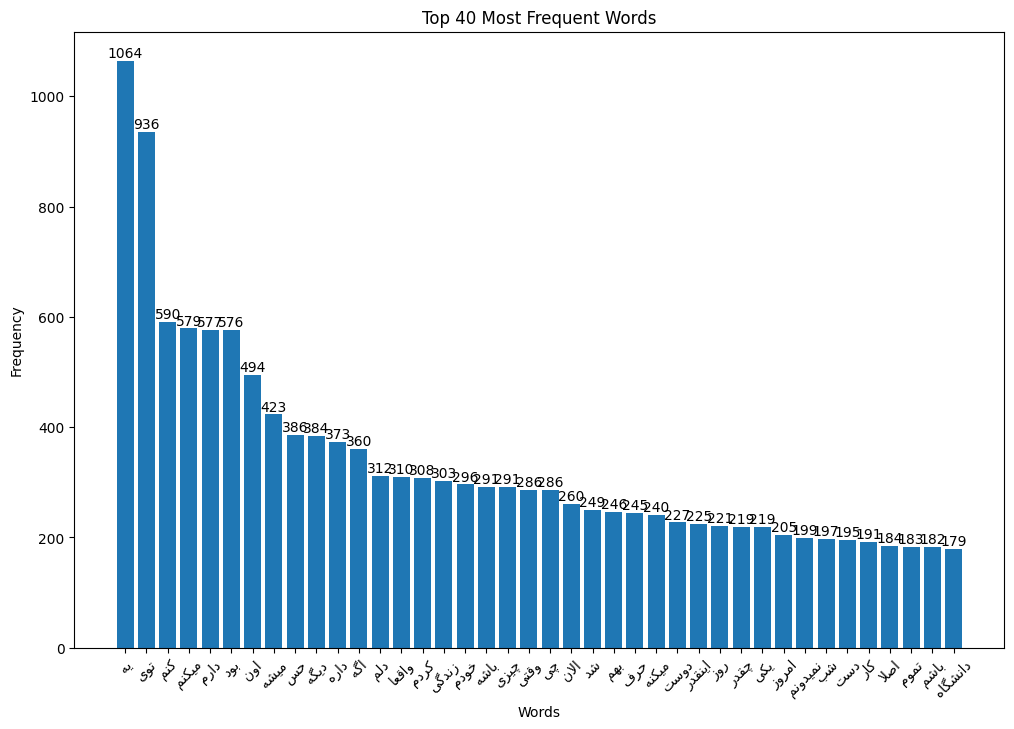

In [106]:
combined_text = ' '.join(df['lemma_text'])

tokens = word_tokenize(combined_text)
word_freq = Counter(tokens)
top_words = word_freq.most_common(40)
words, frequencies = zip(*top_words)
persian_words = [get_display(reshape(word)) for word in words]

plt.figure(figsize=(12, 8))
plt.bar(persian_words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 40 Most Frequent Words')
plt.xticks(rotation=45)
for i, freq in enumerate(frequencies):
    plt.text(i, freq + 1, str(freq), ha='center', va='bottom', fontsize=10)
plt.show()

In [107]:
def get_ngrams(text_series, n):
    # Tokenize the text
    tokens = text_series.apply(word_tokenize)
    
    # Generate n-grams, handling empty token lists
    ngrams_list = tokens.apply(lambda x: list(ngrams(x, n)) if len(x) >= n else [])
    
    # Flatten the list of n-grams and count frequencies
    ngrams_flat = [ngram for sublist in ngrams_list for ngram in sublist]
    ngram_freq = Counter(ngrams_flat)
    
    return ngram_freq

# Function to plot n-grams
def plot_ngrams(ngram_freq, n, top_n=10):
    # Get the most common n-grams
    common_ngrams = ngram_freq.most_common(top_n)
    
    # Unzip the n-grams and their frequencies
    ngrams, freqs = zip(*common_ngrams) if common_ngrams else ([], [])
    
    # Convert n-grams to string representation
    ngram_labels = [' '.join(ngram) for ngram in ngrams]
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(ngram_labels, freqs)
    plt.title(f'Top {top_n} {n}-grams')
    plt.xlabel(f'{n}-grams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.show()



# # Generate and plot bigrams


# # Generate and plot trigrams
# trigram_freq = get_ngrams(data['text'], 3)
# plot_ngrams(trigram_freq, 3)

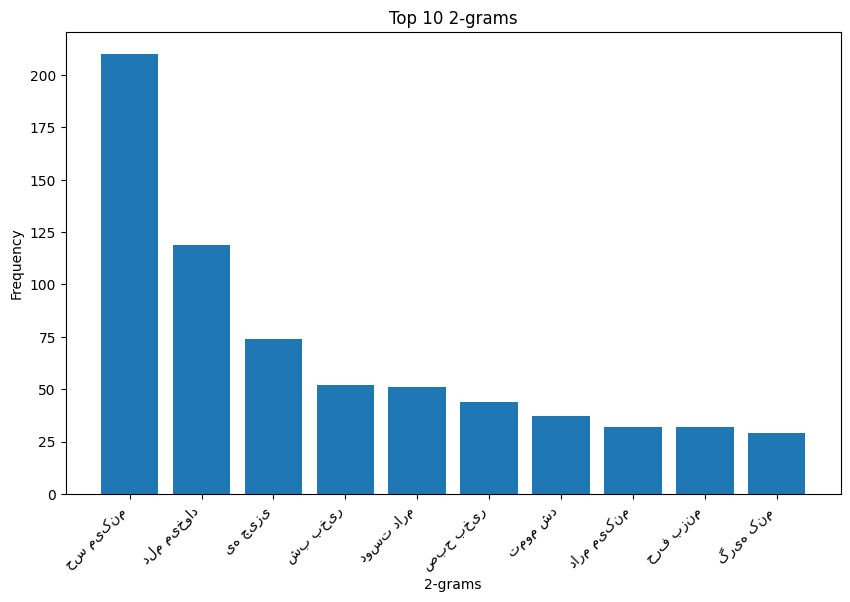

In [108]:
bigram_freq = get_ngrams(df['lemma_text'], 2)
plot_ngrams(bigram_freq, 2)

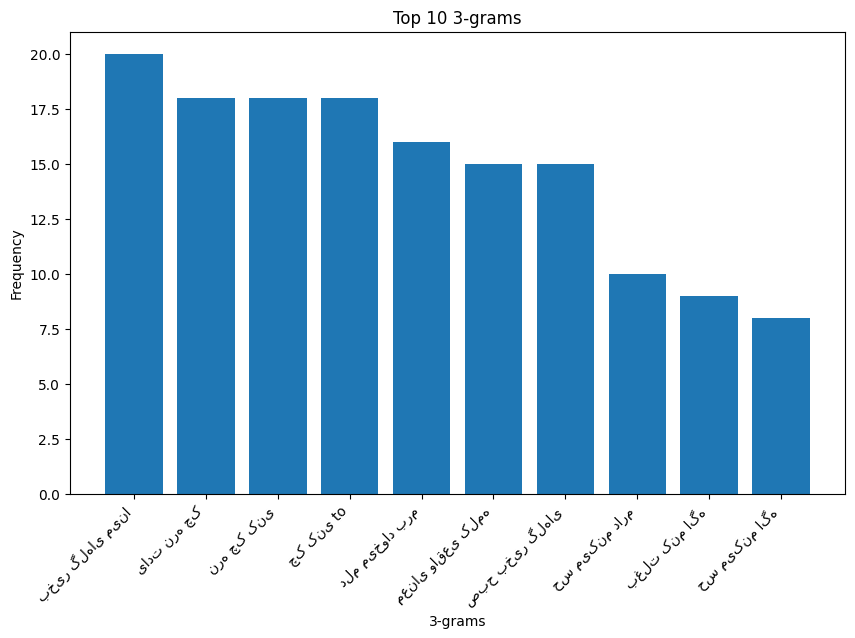

In [109]:
bigram_freq = get_ngrams(df['lemma_text'], 3)
plot_ngrams(bigram_freq, 3)